In [1]:
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
#1. Load Data
df=pd.read_csv('/Users/jinli/Downloads/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
df.shape

(9134, 24)

In [4]:
#2. Variable Encoding
##2.1. Response Variable: Response
df['Engaged']=df['Response'].apply(lambda x: 1 if x=='Yes' else 0)
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Engaged
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0


In [5]:
df['Engaged'].mean()

0.14320122618786948

In [6]:
##2.2. Features
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Engaged
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,0.143201
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.350297
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,0.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,0.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,0.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.000000


In [7]:
df.describe().columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount',
       'Engaged'],
      dtype='object')

In [20]:
continuous_features =['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']

In [21]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income',
       ...
       'Marital.Status.Single', 'Education.Bachelor', 'Education.College',
       'Education.Doctor', 'Education.High School or Below',
       'Education.Master', 'Coverage.Basic', 'Coverage.Extended',
       'Coverage.Premium', 'Is.Female'],
      dtype='object', length=108)

In [22]:
to_encode=[]
for x in df.columns:
    if x not in df.describe().columns:
        to_encode.append(x)
        print (x)

Customer
State
Response
Coverage
Education
Effective To Date
EmploymentStatus
Gender
Location Code
Marital Status
Policy Type
Policy
Renew Offer Type
Sales Channel
Vehicle Class
Vehicle Size


In [23]:

columns_to_encode = [
    'Sales Channel', 'Vehicle Size', 'Vehicle Class', 'Policy', 'Policy Type', 
    'EmploymentStatus', 'Marital Status', 'Education', 'Coverage'
]

categorical_features = []
for col in columns_to_encode:
    encoded_df = pd.get_dummies(df[col])
    encoded_df.columns = [col.replace(' ', '.') + '.' + x for x in encoded_df.columns]
    
    categorical_features += list(encoded_df.columns)
    
    df = pd.concat([df, encoded_df], axis=1)

In [24]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Marital.Status.Married,Marital.Status.Single,Education.Bachelor,Education.College,Education.Doctor,Education.High School or Below,Education.Master,Coverage.Basic,Coverage.Extended,Coverage.Premium
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,1,0,1,0,0,0,0,1,0,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,1,1,0,0,0,0,0,1,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,1,0,1,0,0,0,0,0,0,1
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,1,0,1,0,0,0,0,1,0,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,1,0,0,0,0,1,0,0


In [25]:
print(categorical_features)
print(continuous_features)

['Sales.Channel.Agent', 'Sales.Channel.Branch', 'Sales.Channel.Call Center', 'Sales.Channel.Web', 'Vehicle.Size.Large', 'Vehicle.Size.Medsize', 'Vehicle.Size.Small', 'Vehicle.Class.Four-Door Car', 'Vehicle.Class.Luxury Car', 'Vehicle.Class.Luxury SUV', 'Vehicle.Class.SUV', 'Vehicle.Class.Sports Car', 'Vehicle.Class.Two-Door Car', 'Policy.Corporate L1', 'Policy.Corporate L2', 'Policy.Corporate L3', 'Policy.Personal L1', 'Policy.Personal L2', 'Policy.Personal L3', 'Policy.Special L1', 'Policy.Special L2', 'Policy.Special L3', 'Policy.Type.Corporate Auto', 'Policy.Type.Personal Auto', 'Policy.Type.Special Auto', 'EmploymentStatus.Disabled', 'EmploymentStatus.Employed', 'EmploymentStatus.Medical Leave', 'EmploymentStatus.Retired', 'EmploymentStatus.Unemployed', 'Marital.Status.Divorced', 'Marital.Status.Married', 'Marital.Status.Single', 'Education.Bachelor', 'Education.College', 'Education.Doctor', 'Education.High School or Below', 'Education.Master', 'Coverage.Basic', 'Coverage.Extended'

In [26]:
df['Is.Female'] = df['Gender'].apply(lambda x: 1 if x == 'F' else 0)

In [27]:
categorical_features.append('Is.Female')

In [28]:
all_features = continuous_features + categorical_features

In [30]:
response='Engaged'

In [31]:
sample_df=df[all_features+[response]]
sample_df.columns = [x.replace(' ', '.') for x in sample_df.columns]
all_features = [x.replace(' ', '.') for x in all_features]

In [33]:
sample_df.head()

,Customer.Lifetime.Value,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Sales.Channel.Agent,Sales.Channel.Agent,...,Coverage.Basic,Coverage.Basic,Coverage.Extended,Coverage.Extended,Coverage.Extended,Coverage.Premium,Coverage.Premium,Coverage.Premium,Is.Female,Engaged
0,2763.519279,56274,69,32,5,0,1,384.811147,1,1,...,1,1,0,0,0,0,0,0,1,0
1,6979.535903,0,94,13,42,0,8,1131.464935,1,1,...,0,0,1,1,1,0,0,0,1,0
2,12887.431650,48767,108,18,38,0,2,566.472247,1,1,...,0,0,0,0,0,1,1,1,1,0
3,7645.861827,0,106,18,65,0,7,529.881344,0,0,...,1,1,0,0,0,0,0,0,0,0
4,2813.692575,43836,73,12,44,0,1,138.130879,1,1,...,1,1,0,0,0,0,0,0,0,0


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(sample_df[all_features], sample_df[response], test_size=0.3)



In [35]:
sample_df.shape

(9134, 133)

In [36]:
x_train.shape

(6393, 132)

In [37]:
x_test.shape

(2741, 132)

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier()
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5
)
rf_model.fit(X=x_train, y=y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
#information of each indiviual tree
rf_model.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1789184197, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1116992699, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                        max_features='auto', max_leaf_nodes=None,
                        mi

In [77]:
#get the predictions from the first sub-estimator in the forest:
rf_model.estimators_[0].predict(x_test)[:10]
#different trees predict differently for each record of the test set.
#This is because each tree is trained with different subsets of features that are randomly selected.



array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [78]:
rf_model.feature_importances_

array([2.72858117e-02, 4.81634721e-02, 3.47898321e-02, 1.73866511e-02,
       2.78919976e-02, 8.73213995e-03, 1.00447458e-02, 3.47753434e-02,
       1.62399110e-02, 1.50649249e-02, 1.36926242e-02, 2.78541591e-03,
       3.58054870e-03, 3.27522254e-03, 2.26140737e-03, 2.59367763e-03,
       2.68841504e-03, 1.46638979e-03, 1.08824558e-03, 1.64630214e-03,
       4.67955150e-03, 4.20382931e-03, 3.02595143e-03, 2.77688354e-03,
       3.24214626e-03, 2.97785623e-03, 2.64201091e-03, 2.54237239e-03,
       2.80438774e-03, 2.67154202e-03, 2.51435438e-03, 2.11030457e-03,
       3.79985045e-04, 1.61809735e-04, 2.93171110e-04, 3.13044763e-03,
       2.21542764e-03, 2.86990869e-03, 2.73333126e-03, 2.56685901e-03,
       2.59644392e-03, 1.02958011e-03, 9.12246772e-04, 1.70043921e-03,
       8.72522574e-04, 1.93928282e-03, 1.42312673e-03, 9.76612473e-05,
       2.34925620e-04, 1.43296174e-04, 4.64289863e-04, 2.16375073e-04,
       5.06756924e-04, 4.01691775e-04, 6.04896517e-04, 7.74771544e-04,
      

In [79]:
feature_importance_df = pd.DataFrame(list(zip(rf_model.feature_importances_, all_features)))
feature_importance_df.columns = ['feature.importance', 'feature']
feature_importance_df.sort_values(by='feature.importance',ascending=False)

,feature.importance,feature
1,0.048163,Income
2,0.034790,Monthly.Premium.Auto
7,0.034775,Total.Claim.Amount
4,0.027892,Months.Since.Policy.Inception
0,0.027286,Customer.Lifetime.Value
3,0.017387,Months.Since.Last.Claim
8,0.016240,Sales.Channel.Agent
9,0.015065,Sales.Channel.Branch
10,0.013693,Sales.Channel.Call.Center
6,0.010045,Number.of.Policies


In [80]:
#Evaluating model
from sklearn.metrics import accuracy_score, precision_score, recall_score
in_sample_preds = rf_model.predict(x_train)
out_sample_preds = rf_model.predict(x_test)

In [81]:
# accuracy
##accuracy_score((actual, predictions))
print("in sample accuracy is:", accuracy_score(y_train, in_sample_preds))
print("out sample accuracy is:", accuracy_score(y_test, out_sample_preds))
 # precision 
print("in sample precision is:", precision_score(y_train, in_sample_preds))
print("out sampleprecision is:", precision_score(y_test, out_sample_preds))
 # recall 
print("in sample recall is:", recall_score(y_train,in_sample_preds))    
print("out samplerecall is:", recall_score(y_test,out_sample_preds))



in sample accuracy is: 0.8747067104645706
out sample accuracy is: 0.8763225100328347
in sample precision is: 0.8830409356725146
out sampleprecision is: 0.7681159420289855
in sample recall is: 0.16201716738197425
out samplerecall is: 0.14095744680851063


In [82]:
from sklearn.metrics import roc_curve, auc
rf_model.predict_proba(x_train)
##separately,the probability of 0 and 1 

array([[0.86423096, 0.13576904],
       [0.85551793, 0.14448207],
       [0.88561928, 0.11438072],
       ...,
       [0.86817331, 0.13182669],
       [0.83482294, 0.16517706],
       [0.88824236, 0.11175764]])

In [83]:
#We only take the second column because we only care the possibility of getting the positive response
in_sample_preds = rf_model.predict_proba(x_train)[:,1]
out_sample_preds = rf_model.predict_proba(x_test)[:,1]

In [87]:
##threshold,less than threshold, the predictive result is 0, otherwise it is 1.
in_sample_fpr, in_sample_tpr, in_sample_thresholds = roc_curve(y_train, in_sample_preds)
out_sample_fpr, out_sample_tpr, out_sample_thresholds = roc_curve(y_test, out_sample_preds)

In [93]:
in_sample_roc_auc = auc(in_sample_fpr, in_sample_tpr)
out_sample_roc_auc = auc(out_sample_fpr, out_sample_tpr)

print('In-Sample AUC: %0.4f' % in_sample_roc_auc)
print('Out-Sample AUC: %0.4f' % out_sample_roc_auc)

In-Sample AUC: 0.8506
Out-Sample AUC: 0.8128


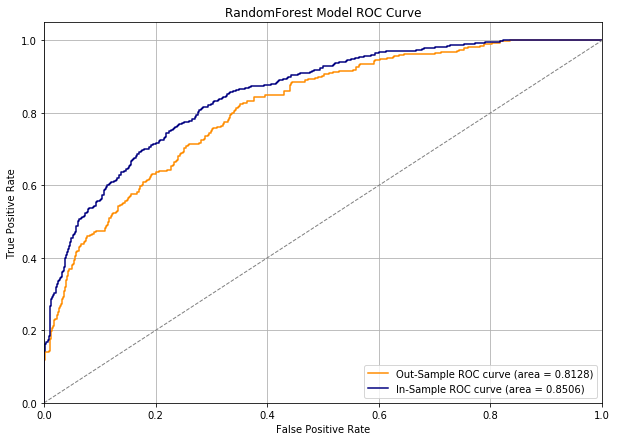

In [96]:
plt.figure(figsize=(10,7))
plt.plot(out_sample_fpr,out_sample_tpr,color="darkorange",label="Out-Sample ROC curve (area = %0.4f)" % out_sample_roc_auc)
plt.plot(in_sample_fpr,in_sample_tpr,color="navy",label="In-Sample ROC curve (area = %0.4f)" % in_sample_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest Model ROC Curve')
plt.legend(loc="lower right")

plt.show()